<a href="https://colab.research.google.com/github/omrane57/cv/blob/main/AUCAND_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
%matplotlib inline

In [11]:
data=pd.read_csv("/content/pima-indians-diabetes.csv")
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
x=data.drop("class",axis=1)
y=data['class']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.50)


In [17]:
model1=LogisticRegression(solver="liblinear")
model2=svm.SVC(kernel="linear",probability=True)
model1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [18]:
model2.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [19]:
p1=model1.predict_proba(x_test)
p2=model2.predict_proba(x_test)

In [21]:
fpr1,tpr1,threshold1=roc_curve(y_test,p1[:,1])
fpr2,tpr2,threshold2=roc_curve(y_test,p2[:,1])
roc_auc1=auc(fpr1,tpr1)
roc_auc2=auc(fpr2,tpr2)


In [24]:
roc_auc1


0.8142158595498998

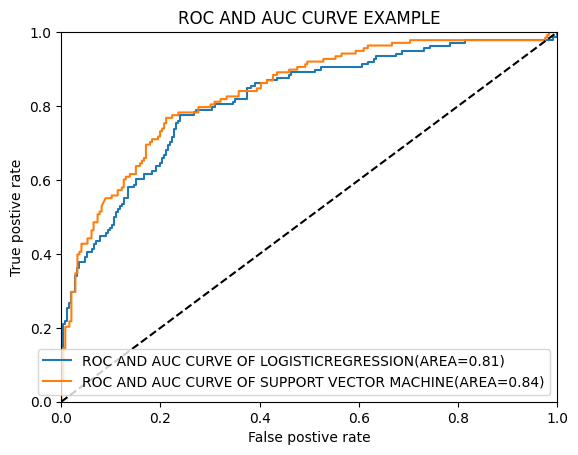

In [31]:
pl.clf()
pl.plot(fpr1,tpr1,label="ROC AND AUC CURVE OF LOGISTICREGRESSION(AREA=%0.2f)"%roc_auc1)
pl.plot(fpr2,tpr2,label="ROC AND AUC CURVE OF SUPPORT VECTOR MACHINE(AREA=%0.2f)"%roc_auc2)
pl.xlabel("False postive rate")
pl.ylabel("True postive rate")
pl.title("ROC AND AUC CURVE EXAMPLE")
pl.legend(loc="lower right")
pl.plot([0,1],[0,1],"k--")
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.show()